In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [29]:
training_dir = os.path.join('./training/project/')
validation_dir = os.path.join('./validation/project/')


# Directory with our training cat/dog pictures
train_achintya_dir = os.path.join(training_dir, 'Achintya')
train_anam_dir = os.path.join(training_dir, 'Anam')
train_angad_dir = os.path.join(training_dir,'Angad')

# Directory with our validation cat/dog pictures
validation_achintya_dir = os.path.join(validation_dir, 'Achintya')
validation_anam_dir = os.path.join(validation_dir, 'Anam')
validation_angad_dir = os.path.join(validation_dir,'Angad')

train_achintya_fnames = os.listdir( train_achintya_dir )
train_anam_fnames = os.listdir( train_anam_dir )
train_angad_fnames = os.listdir( train_angad_dir)

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [39]:
# here remember we will use categorical_crossentropy instead of sparse_categrial_crossentropy
# as we don't need to 
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])

In [41]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(100,100),  # All images will be resized to 150x150
        batch_size=21,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100,100),
        batch_size=15,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=30,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Found 603 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/15
30/30 - 125s - loss: 1.5819 - categorical_accuracy: 0.3846 - val_loss: 1.0553 - val_categorical_accuracy: 0.4067
Epoch 2/15
30/30 - 104s - loss: 1.0441 - categorical_accuracy: 0.4936 - val_loss: 1.7664 - val_categorical_accuracy: 0.3733
Epoch 3/15
30/30 - 97s - loss: 1.0226 - categorical_accuracy: 0.5192 - val_loss: 0.8542 - val_categorical_accuracy: 0.6467
Epoch 4/15
30/30 - 71s - loss: 0.8194 - categorical_accuracy: 0.6522 - val_loss: 0.7972 - val_categorical_accuracy: 0.6467
Epoch 5/15
30/30 - 79s - loss: 0.7951 - categorical_accuracy: 0.6715 - val_loss: 0.6993 - val_categorical_accuracy: 0.7067
Epoch 6/15
30/30 - 84s - loss: 0.7009 - categorical_accuracy: 0.7136 - val_loss: 0.8114 - val_categorical_accuracy: 0.6533
Epoch 7/15
30/30 - 90s - loss: 0.6902 - categorical_accuracy: 0.7206 - val_loss: 0.7010 - val_categorical_accuracy: 0.7533
Epoch 8/15
30/30 - 78s - loss: 0.6674 - categorical_acc

In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [73]:
params = {"xtick.color" : "white",
          "ytick.color" : "white"}
plt.rcParams.update(params)

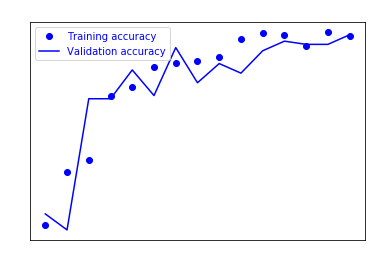

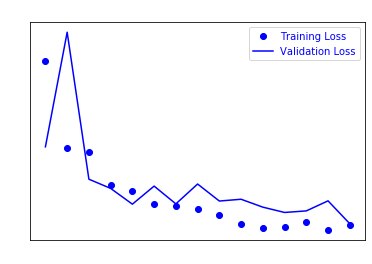

In [74]:

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy',color = 'white')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss',color = 'white')
plt.legend()

plt.show()